In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Group_10_data_cleaned.csv')
df.head(10)

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1
5,5,8,40,1.600,0.550,1.000,2.44,22,40,9,1
6,6,4,24,0.667,0.417,0.708,2.50,10,17,4,1
7,5,6,30,1.200,0.333,0.333,10.00,10,10,1,1
8,5,5,25,1.000,0.400,0.520,10.00,10,13,1,1
9,5,7,35,1.400,0.486,0.914,8.50,17,32,2,1


In [3]:
df.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [4]:
X = df.drop(["class"], axis=1)

y = df["class"]

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,  stratify=y,test_size=0.2, random_state=42)

X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.25, random_state=42)

In [6]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

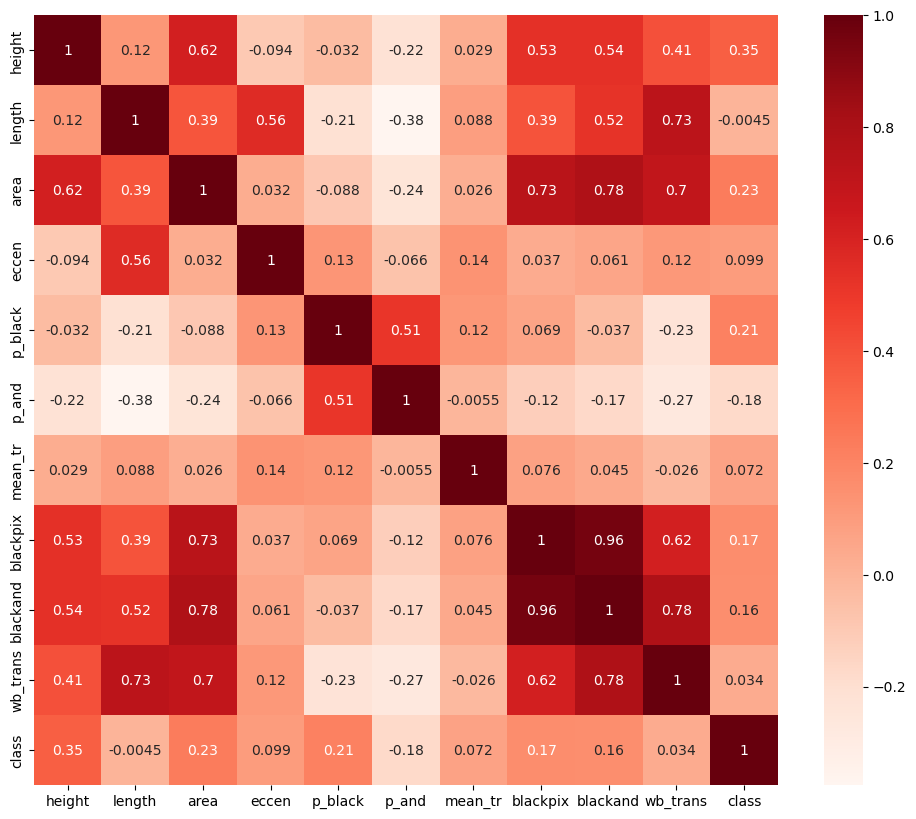

In [7]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Over sampling 

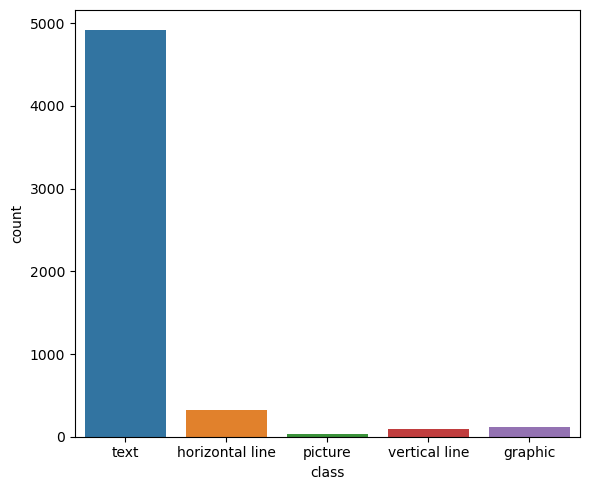

In [8]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x = 'class', data = df)
labs={1: 'text' , 2: 'horizontal line', 3: 'picture',4: 'vertical line',5:'graphic'}
ax.set(xticklabels=labs.values())
plt.tight_layout()
plt.show()

In [9]:
!pip install imblearn

In [10]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train1,y_train1)

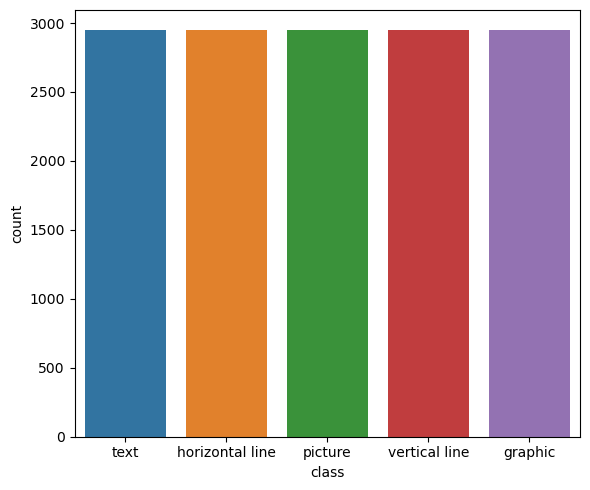

In [11]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x = 'class', data = pd.DataFrame(y_train))
labs={1: 'text' , 2: 'horizontal line', 3: 'picture',4: 'vertical line',5:'graphic'}
ax.set(xticklabels=labs.values())
plt.tight_layout()
plt.show()

### feature selection using lassocv

In [12]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 1.431977
Best score using built-in LassoCV: 0.161089


In [13]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 3 variables


In [14]:
coef

height      0.006292
length     -0.000000
area        0.000041
eccen       0.001559
p_black     0.000000
p_and      -0.000000
mean_tr     0.000185
blackpix   -0.000176
blackand    0.000165
wb_trans   -0.001570
dtype: float64

In [15]:
selected_col=["height", 'area', 'eccen', 'mean_tr', 'blackpix', 'blackand', 'wb_trans']

Text(0.5, 1.0, 'Feature importance using Lasso Model')

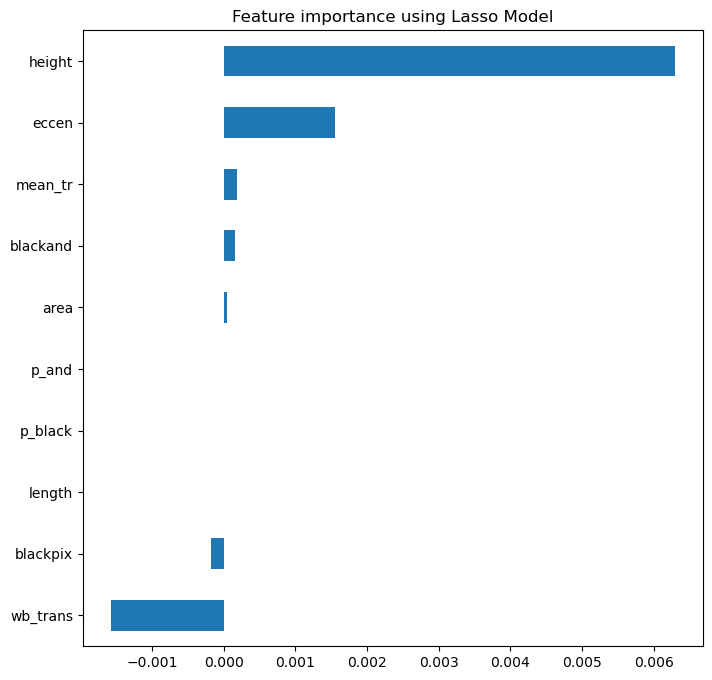

In [16]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Model1- Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 36, 
                               max_features = "sqrt", 
                               max_depth = 20,
                               oob_score = True)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=36,
                       oob_score=True)

In [18]:
importances = model.feature_importances_
importances
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

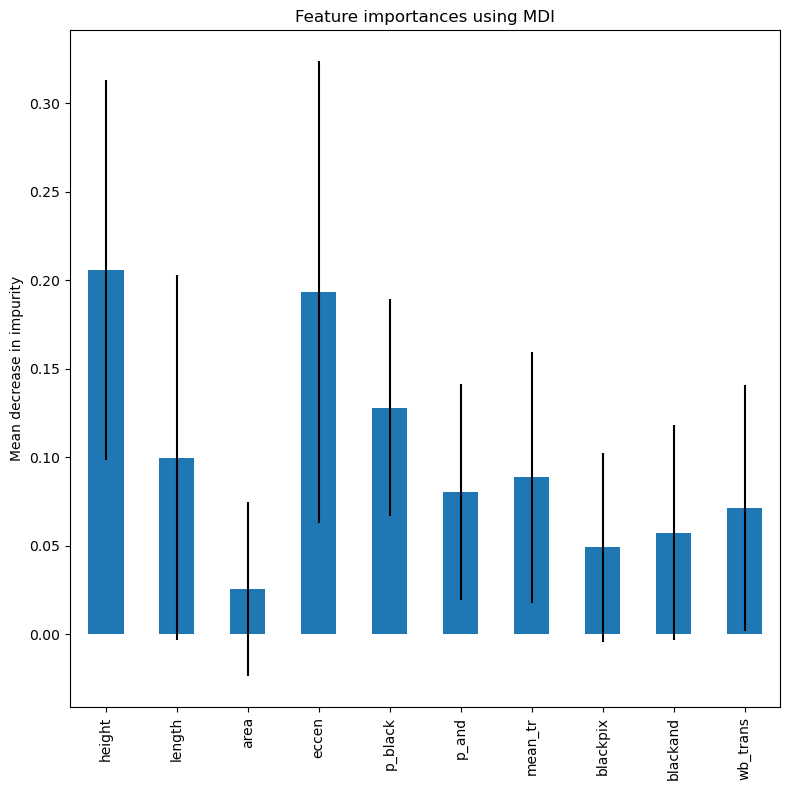

In [19]:
import pandas as pd
feature_names=X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [20]:
model = RandomForestClassifier(n_estimators = 36, 
                               max_features = "sqrt", 
                               max_depth = 20,
                               oob_score = True)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=36,
                       oob_score=True)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model.fit(X_train[selected_col], y_train)
forest_y_pred = model.predict(X_test[selected_col])
print(f"Random Forest Classification Report on Test data using best model")
cm=confusion_matrix(y_test, forest_y_pred)
print(cm)

Random Forest Classification Report on Test data using best model
[[961   9   1   1  11]
 [  1  61   0   3   1]
 [  0   0   3   0   2]
 [  2   0   0  16   0]
 [  5   1   1   0  16]]


In [22]:
accuracy_score(y_test, forest_y_pred)

0.965296803652968

In [23]:
print(classification_report(y_test, forest_y_pred), "\n")

              precision    recall  f1-score   support

           1       0.99      0.98      0.98       983
           2       0.86      0.92      0.89        66
           3       0.60      0.60      0.60         5
           4       0.80      0.89      0.84        18
           5       0.53      0.70      0.60        23

    accuracy                           0.97      1095
   macro avg       0.76      0.82      0.78      1095
weighted avg       0.97      0.97      0.97      1095
 



## Model2 - SVM

RBF Kernel

In [43]:
from sklearn.svm import SVC
model1 = SVC(kernel="rbf", gamma = 'scale', C=5)
model1.fit(X_train[selected_col], y_train)

SVC(C=5)

In [25]:
y_pred_test= model1.predict(X_test[selected_col])
accuracy_score(y_test, y_pred_test)

0.5114155251141552

In [26]:
y_pred_train= model1.predict(X_train[selected_col])
accuracy_score(y_train, y_pred_train)

0.5938242280285035

In [27]:
print(f"Support Vector Classification Report on Test data using best model")
cm=confusion_matrix(y_test, y_pred_test)
print(cm)

Support Vector Classification Report on Test data using best model
[[508   5  18 421  31]
 [  0  15   5  46   0]
 [  1   0   4   0   0]
 [  0   0   0  18   0]
 [  2   1   0   5  15]]


In [28]:
print(classification_report(y_test, y_pred_test), "\n")

              precision    recall  f1-score   support

           1       0.99      0.52      0.68       983
           2       0.71      0.23      0.34        66
           3       0.15      0.80      0.25         5
           4       0.04      1.00      0.07        18
           5       0.33      0.65      0.43        23

    accuracy                           0.51      1095
   macro avg       0.44      0.64      0.36      1095
weighted avg       0.94      0.51      0.64      1095
 



## Model3 -  KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9260273972602739

In [32]:
print(f"KNN Report on Test data using best model")
cm=confusion_matrix(y_test, y_pred)
print(cm)

KNN Report on Test data using best model
[[925  19   5   4  30]
 [  4  54   2   3   3]
 [  1   0   4   0   0]
 [  4   0   0  14   0]
 [  3   1   0   2  17]]


In [33]:
print(classification_report(y_test, y_pred), "\n")

              precision    recall  f1-score   support

           1       0.99      0.94      0.96       983
           2       0.73      0.82      0.77        66
           3       0.36      0.80      0.50         5
           4       0.61      0.78      0.68        18
           5       0.34      0.74      0.47        23

    accuracy                           0.93      1095
   macro avg       0.61      0.82      0.68      1095
weighted avg       0.95      0.93      0.93      1095
 



1. KNN and Random Forest performs way better than SVM (RBF kernel).
2. so hyper tuning these model might increase the accuracy instead of using the default parameters

## Hyper-Tunning 

#### Random Forest Tunning 

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [35]:
rfc = RandomForestClassifier()

random_grid = {"n_estimators": range(10, 50, 20),
               "max_features": ["sqrt", "log2"],
               "max_depth": range(10, 50, 20)
              }

rfc_rs = RandomizedSearchCV(rfc, 
                            param_distributions = random_grid,
                            cv = 5, 
                            n_iter = 100, 
                            scoring = "accuracy")

rfc_rs.fit(X_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': range(10, 50, 20),
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': range(10, 50, 20)},
                   scoring='accuracy')

In [36]:
print(rfc_rs.best_params_)

print(rfc_rs.best_score_)## Best K found from GridSearchCV

{'n_estimators': 30, 'max_features': 'log2', 'max_depth': 30}
0.9938920936545639


In [37]:
rfc_rs.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=30)

In [38]:
accuracy_score(y_test, rfc_rs.best_estimator_.predict(X_test))

0.9662100456621004

#### SVM 

In [45]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
param_grid = {'C':[0.1,1],
             'gamma':[1,0.1,0.01],
             'kernel':['rbf']}
grid = GridSearchCV(svc,param_grid,refit = True, verbose = 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.378 total time=  19.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.422 total time=  20.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.367 total time=  21.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.355 total time=  20.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.367 total time=  19.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.487 total time=  18.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=  18.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.498 total time=  19.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.495 total time=  18.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.495 total time=  21.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.571 total time=  35.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [46]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [47]:
print(grid.best_params_)

print(grid.best_score_)## Best K found from GridSearchCV

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.7814048184594503


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_score(y_test, grid.best_estimator_.predict(X_test))

0.4958904109589041

#### KNN 

In [38]:
from sklearn.neighbors import KNeighborsClassifier
gs = GridSearchCV(estimator = KNeighborsClassifier(),
                  param_grid = {"n_neighbors": range(1,21),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5)

gs.fit(X_train, y_train)

gs.cv_results_### Distribution of Target Categories after oversampling### Distribution of Target Categories after oversampling

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

{'mean_fit_time': array([0.0274735 , 0.0281703 , 0.02572188, 0.02725053, 0.02829838,
        0.02863164, 0.02905207, 0.02885141, 0.0280076 , 0.02841024,
        0.02995033, 0.03279009, 0.03757238, 0.03290615, 0.03303428,
        0.03409014, 0.0351903 , 0.02939086, 0.0268436 , 0.02763362,
        0.03102798, 0.03086476, 0.02981358, 0.02718267, 0.02630067,
        0.03014822, 0.02487097, 0.02960315, 0.03204722, 0.02922401,
        0.02816358, 0.03240671, 0.02783976, 0.02850761, 0.03018637,
        0.02991557, 0.02954893, 0.028304  , 0.02871356, 0.02839041,
        0.02697911, 0.03089614, 0.02785387, 0.03433347, 0.03310246,
        0.02867527, 0.02787051, 0.02963142, 0.02958145, 0.03118286,
        0.02864342, 0.03036904, 0.02951918, 0.0292202 , 0.03389831,
        0.02956109, 0.03083725, 0.02912002, 0.02705426, 0.03036065,
        0.02577233, 0.02766399, 0.02939081, 0.03003297, 0.02725296,
        0.02730298, 0.02658129, 0.0289299 , 0.02771153, 0.02880011,
        0.0266089 , 0.0295445 ,

In [39]:
results = pd.DataFrame(gs.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027473,0.006259,0.064273,0.005871,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.985070,0.990499,0.991517,0.989481,0.990838,0.989481,0.002301,1
1,0.028170,0.004222,0.008485,0.003209,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.985070,0.990499,0.991517,0.989481,0.990838,0.989481,0.002301,1
2,0.025722,0.003976,0.065873,0.010647,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.984052,0.989141,0.991177,0.987784,0.989481,0.988327,0.002396,4
3,0.027251,0.003972,0.012866,0.006645,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.984052,0.989141,0.991177,0.987784,0.989481,0.988327,0.002396,4
4,0.028298,0.005486,0.066069,0.005027,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.985070,0.989481,0.991856,0.987445,0.987445,0.988259,0.002277,6


In [40]:
results[["param_n_neighbors", "param_weights", "param_p", "mean_test_score", "rank_test_score"]].head()

,param_n_neighbors,param_weights,param_p,mean_test_score,rank_test_score
0,1,uniform,1,0.989481,1
1,1,distance,1,0.989481,1
2,1,uniform,2,0.988327,4
3,1,distance,2,0.988327,4
4,2,uniform,1,0.988259,6


In [41]:
gs.best_score_

0.989480827960638

In [50]:
gs.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [51]:
accuracy_score(y_test, gs.best_estimator_.predict(X_test))

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9406392694063926

### Results 

1.  For this problem statement(the page block classification), <B>Random Forest performs better than KNN and SVM.</B><br>
    Even KNN provide good results almost similar to the Random Forest which is less complex than Random Forest.<br><br>
2.  After Hyper-Tunning:<br>
    Time complexity for models, SVM(RBF kernel) > Random Forest > KNN
    Test Accuracy for models, Random Forest > KNN > SVM (RBF Kernel)<br>
[0.96 > 0.94 > 0.50]<br><br>
3.  Best Parameters for Random Forest {'n_estimators': 30, 'max_features': 'log2', 'max_depth': 30} <br>
    Best Parameters for KNN {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}<br>
    Best Parameters for SVM {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}